In [49]:
import pandas as pd

# Load datasets with specified encoding
customers = pd.read_csv("D:\\Global Electronics\\Customers.csv", encoding="unicode_escape")
products = pd.read_csv("D:\\Global Electronics\\Products.csv", encoding="unicode_escape")
sales = pd.read_csv("D:\\Global Electronics\\Sales.csv", encoding="unicode_escape")
stores = pd.read_csv("D:\\Global Electronics\\Stores.csv", encoding="unicode_escape")
exchange_rates = pd.read_csv("D:\\Global Electronics\\Exchange_Rates.csv", encoding="unicode_escape")

# Data Cleaning
def clean_data(df):
    # Handle missing values
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    return df

customers = clean_data(customers)
products = clean_data(products)
sales = clean_data(sales)
stores = clean_data(stores)
exchange_rates = clean_data(exchange_rates)

# Merging dataframes
merged_data = pd.merge(sales, customers, on="CustomerKey")
merged_data = pd.merge(merged_data, products, on="ProductKey")
merged_data = pd.merge(merged_data, stores, on="StoreKey")

# Converting date columns to datetime format
merged_data["Order Date"] = pd.to_datetime(merged_data["Order Date"])
merged_data["Delivery Date"] = pd.to_datetime(merged_data["Delivery Date"])
merged_data["Birthday"] = pd.to_datetime(merged_data["Birthday"])
merged_data["Open Date"] = pd.to_datetime(merged_data["Open Date"])

# Range of dates for each column
print(f"Order Date: {merged_data['Order Date'].min(), merged_data['Order Date'].max()}")
print(f"Delivery Date: {merged_data['Delivery Date'].min(), merged_data['Delivery Date'].max()}")
print(f"Birthday: {merged_data['Birthday'].min(), merged_data['Birthday'].max()}")
print(f"Open Date: {merged_data['Open Date'].min(), merged_data['Open Date'].max()}")

# Handling exchange rates
exchange_rates.info()
exchange_rates["Date"] = pd.to_datetime(exchange_rates["Date"])
print(f"Date: {exchange_rates['Date'].min(), exchange_rates['Date'].max()}")

# Merging exchange rates with merged data
merged_data = pd.merge(merged_data, exchange_rates, left_on="Order Date", right_on="Date", how="left")

# Save the merged data to a CSV file
merged_data.to_csv("merged_data.csv", encoding="utf-8", index=False)

Order Date: (Timestamp('2016-01-01 00:00:00'), Timestamp('2021-02-20 00:00:00'))
Delivery Date: (Timestamp('2016-01-06 00:00:00'), Timestamp('2021-02-27 00:00:00'))
Birthday: (Timestamp('1935-02-04 00:00:00'), Timestamp('2002-01-30 00:00:00'))
Open Date: (Timestamp('2005-03-04 00:00:00'), Timestamp('2019-03-05 00:00:00'))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB
Date: (Timestamp('2015-01-01 00:00:00'), Timestamp('2021-02-20 00:00:00'))


In [11]:
import pandas as pd
import mysql.connector

In [50]:
merged_data = pd.read_csv("D:\\Global Electronics\\merged_data.csv")
merged_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Subcategory,CategoryKey,Category,Country_y,State_y,Square Meters,Open Date,Date,Currency,Exchange
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,USD,1.0000
1,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,CAD,1.3884
2,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,AUD,1.3683
3,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,EUR,0.9185
4,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,Male,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,GBP,0.6742


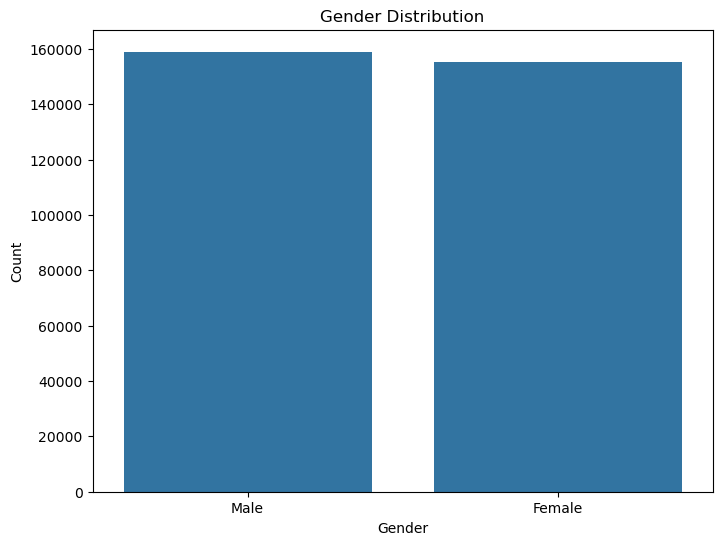

In [79]:
#Gender distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=merged_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

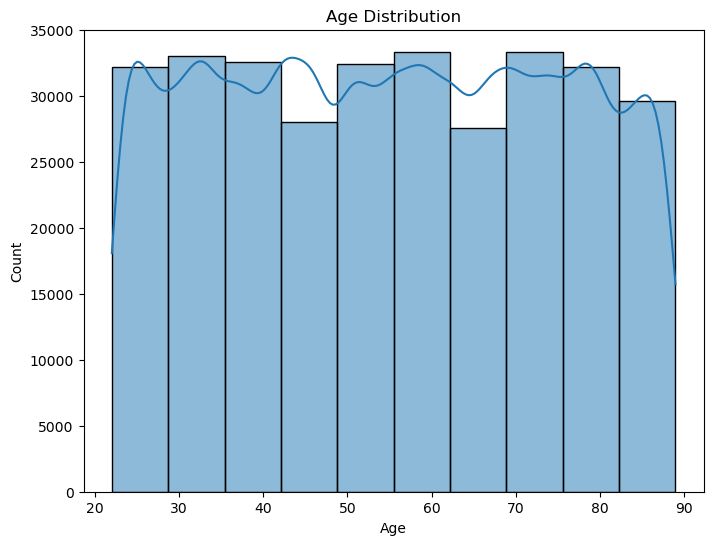

In [80]:
# Age distribution

merged_data['Age'] = (pd.to_datetime('today') - pd.to_datetime(merged_data['Birthday'])).dt.days // 365

plt.figure(figsize=(8, 6))
sns.histplot(merged_data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

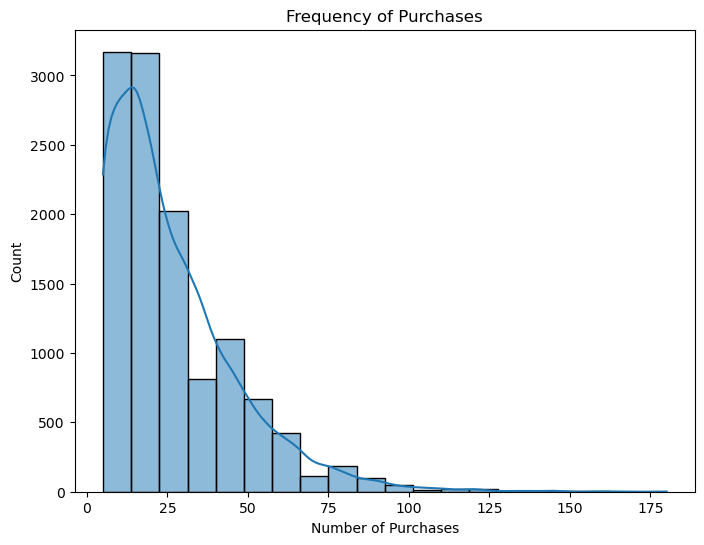

In [81]:
# Frequency of Purchases
purchase_frequency = merged_data.groupby('CustomerKey')['Order Date'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.histplot(purchase_frequency['Order Date'], bins=20, kde=True)
plt.title('Frequency of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Count')
plt.show()

In [82]:
# Connect to MySQL server
conn = mysql.connector.connect(host="localhost", user="root", password="12345678")

cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS Global_Electronics")
cursor.close()
conn.close()

In [83]:
# Connect to the new database
conn = mysql.connector.connect(
    host="localhost", user="root", password="12345678", database="Global_Electronics"
)

cursor = conn.cursor()

In [84]:
# Get column names and types
columns = merged_data.columns
column_types = []

# Define a mapping from pandas dtype to SQL type
type_mapping = {
    "int64": "INT",
    "float64": "FLOAT",
    "object": "VARCHAR(255)",
    "datetime64[ns]": "DATETIME",
}

# Generate column type definitions
for col in columns:
    dtype = str(merged_data[col].dtype)
    sql_type = type_mapping.get(dtype, "VARCHAR(255)")
    column_types.append(f"`{col}` {sql_type}")

# Create SQL statement for table creation
create_table_query = f"""
CREATE TABLE IF NOT EXISTS Global_Electronics_Table (
    {', '.join(column_types)}
)
"""

cursor.execute(create_table_query)

In [8]:
# Prepare the INSERT INTO SQL statement
insert_query = f"""
INSERT INTO Global_Electronics_Table ({', '.join([f'`{col}`' for col in columns])})
VALUES ({', '.join(['%s'] * len(columns))})
"""

# Insert the data
for index, row in merged_data.iterrows():
    cursor.execute(insert_query, tuple(row))

# Commit the transaction
conn.commit()

In [9]:
# Close the cursor and connection
cursor.close()
conn.close()

In [85]:
#1 Analyze the distribution of customers based on gender
query = '''
        SELECT gender, 
        COUNT(*) AS count 
        FROM Global_Electronics_Table 
        GROUP BY gender
        '''
cursor.execute(query)
for table in cursor:
    print(table)

('Male', 318040)
('Female', 310800)


In [86]:
#2 Analyze the distribution of customers based on age
query = '''
        SELECT YEAR(CURDATE()) - YEAR(Birthday) AS age, 
        COUNT(*) AS count 
        FROM Global_Electronics_Table 
        GROUP BY age 
        ORDER BY age
        '''
cursor.execute(query)
for table in cursor:
    print(table)

(22, 760)
(23, 12360)
(24, 10510)
(25, 9600)
(26, 10510)
(27, 8160)
(28, 9350)
(29, 8820)
(30, 9490)
(31, 9350)
(32, 9220)
(33, 10800)
(34, 9760)
(35, 8780)
(36, 8780)
(37, 9360)
(38, 9360)
(39, 9940)
(40, 8090)
(41, 8400)
(42, 10810)
(43, 9840)
(44, 10950)
(45, 8290)
(46, 9400)
(47, 10780)
(48, 8180)
(49, 7410)
(50, 9030)
(51, 9550)
(52, 9440)
(53, 10520)
(54, 7900)
(55, 9440)
(56, 10580)
(57, 8220)
(58, 8970)
(59, 11230)
(60, 9230)
(61, 9110)
(62, 9130)
(63, 10000)
(64, 8400)
(65, 9030)
(66, 9300)
(67, 9340)
(68, 9710)
(69, 9560)
(70, 10210)
(71, 8700)
(72, 8930)
(73, 9800)
(74, 9850)
(75, 9630)
(76, 9550)
(77, 7960)
(78, 9690)
(79, 11480)
(80, 7840)
(81, 10010)
(82, 8130)
(83, 9290)
(84, 7860)
(85, 8620)
(86, 9760)
(87, 10320)
(88, 8620)
(89, 7840)


In [87]:
#3 Analyze the distribution of customers based on location (city, state, country)
query = '''
        SELECT City, State_x, Country_x, 
        COUNT(*) AS count 
        FROM Global_Electronics_Table 
        GROUP BY City, State_x, Country_x 
        ORDER BY count DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)

('Toronto', 'Ontario', 'Canada', 6810)
('Los Angeles', 'California', 'United States', 5790)
('New York', 'New York', 'United States', 5690)
('Houston', 'Texas', 'United States', 4380)
('Chicago', 'Illinois', 'United States', 3680)
('Montreal', 'Quebec', 'Canada', 3610)
('Philadelphia', 'Pennsylvania', 'United States', 3570)
('Dallas', 'Texas', 'United States', 2820)
('Calgary', 'Alberta', 'Canada', 2670)
('Atlanta', 'Georgia', 'United States', 2480)
('Southfield', 'Michigan', 'United States', 2390)
('San Francisco', 'California', 'United States', 2370)
('Seattle', 'Washington', 'United States', 2350)
('Miami', 'Florida', 'United States', 2230)
('Oakland', 'California', 'United States', 2060)
('Grand Rapids', 'Michigan', 'United States', 2030)
('San Antonio', 'Texas', 'United States', 1980)
('Memphis', 'Tennessee', 'United States', 1890)
('Indianapolis', 'Indiana', 'United States', 1850)
('Ottawa', 'Ontario', 'Canada', 1840)
('Vancouver', 'British Columbia', 'Canada', 1820)
('Phoenix', 

In [88]:
#4 Identify purchasing patterns such as average order value and frequency of purchases
query = '''
        SELECT CustomerKey, 
        ROUND(AVG(Quantity * CAST(REPLACE(`Unit Price USD`, '$', '') AS DECIMAL(10, 2))), 2) AS avg_order_value, 
        COUNT(`Order Number`) AS purchase_frequency
        FROM Global_Electronics_Table
        GROUP BY CustomerKey
        ORDER BY purchase_frequency DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)

(723572, Decimal('956.36'), 360)
(1925694, Decimal('823.11'), 320)
(1579183, Decimal('1083.51'), 320)
(1942072, Decimal('864.80'), 290)
(1492176, Decimal('890.71'), 290)
(2080484, Decimal('591.05'), 290)
(1521733, Decimal('520.91'), 290)
(1972249, Decimal('995.50'), 290)
(793686, Decimal('467.77'), 280)
(382960, Decimal('355.43'), 280)
(780974, Decimal('809.30'), 270)
(1849306, Decimal('643.97'), 270)
(946857, Decimal('670.18'), 270)
(1388023, Decimal('738.41'), 270)
(1638118, Decimal('1117.46'), 260)
(1523982, Decimal('846.76'), 260)
(1057055, Decimal('383.39'), 250)
(461982, Decimal('860.10'), 250)
(1231909, Decimal('696.45'), 250)
(998374, Decimal('432.56'), 250)
(522806, Decimal('730.09'), 240)
(224111, Decimal('434.47'), 240)
(1049861, Decimal('508.58'), 240)
(1410548, Decimal('381.33'), 240)
(1098687, Decimal('926.48'), 240)
(1610098, Decimal('852.43'), 240)
(1439502, Decimal('818.01'), 240)
(1328055, Decimal('539.34'), 240)
(1818102, Decimal('356.76'), 240)
(1060423, Decimal('55

In [89]:
#5 Segment customers based on demographics and purchasing behavior
query = '''
        SELECT CustomerKey, Gender, 
        YEAR(CURDATE()) - YEAR(Birthday) AS age, City, State_x, Country_x, 
        ROUND(AVG(Quantity * CAST(REPLACE(`Unit Price USD`, '$', '') AS DECIMAL(10, 2))), 2) AS avg_order_value, 
        COUNT(`Order Number`) AS purchase_frequency
        FROM Global_Electronics_Table
        GROUP BY CustomerKey, Gender, age, City, State_x, Country_x
        ORDER BY avg_order_value DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)

(271212, 'Female', 31, 'Ottawa', 'Ontario', 'Canada', Decimal('7992.00'), 10)
(1157256, 'Female', 71, 'DOWNEND', 'Bristol', 'United Kingdom', Decimal('7984.00'), 10)
(2084056, 'Male', 29, 'Hanover', 'Maryland', 'United States', Decimal('7352.00'), 10)
(1137620, 'Female', 46, 'STAUNTON ON ARROW', 'Hereford', 'United Kingdom', Decimal('6993.00'), 10)
(1156460, 'Female', 31, 'LITTLE BERKHAMSTED', 'East Hertfordshire', 'United Kingdom', Decimal('6783.00'), 10)
(1211756, 'Female', 79, 'Columbia', 'Maryland', 'United States', Decimal('6783.00'), 10)
(1496323, 'Male', 44, 'Tampa', 'Florida', 'United States', Decimal('6783.00'), 10)
(1829841, 'Male', 70, 'West Roxbury', 'Massachusetts', 'United States', Decimal('6552.00'), 10)
(544830, 'Female', 74, 'Remscheid Lüttringhausen', 'Nordrhein-Westfalen', 'Germany', Decimal('6293.00'), 10)
(1618759, 'Male', 67, 'Golden Valley', 'Minnesota', 'United States', Decimal('6142.50'), 10)
(891356, 'Female', 68, 'Grijpskerke', 'Zeeland', 'Netherlands', Decim

In [90]:
#6 Analyze total sales over time, identifying trends and seasonality
query = '''
        SELECT DATE_FORMAT(`Order Date`, '%Y-%m') AS month, 
        SUM(Quantity * CAST(REPLACE(REPLACE(`Unit Price USD`, '$', ''), ' ', '') AS DECIMAL(10, 2))) AS total_sales
        FROM Global_Electronics_Table
        GROUP BY month
        ORDER BY month
        '''
cursor.execute(query)
for table in cursor:
    print(table)

('2016-01', Decimal('4441802.00'))
('2016-02', Decimal('5555438.70'))
('2016-03', Decimal('1959702.50'))
('2016-04', Decimal('784948.00'))
('2016-05', Decimal('3675497.70'))
('2016-06', Decimal('4194394.40'))
('2016-07', Decimal('3412580.40'))
('2016-08', Decimal('3674353.30'))
('2016-09', Decimal('4192216.20'))
('2016-10', Decimal('4573027.60'))
('2016-11', Decimal('4241036.90'))
('2016-12', Decimal('7233654.10'))
('2017-01', Decimal('5039835.30'))
('2017-02', Decimal('5840214.30'))
('2017-03', Decimal('2540027.10'))
('2017-04', Decimal('309905.30'))
('2017-05', Decimal('4730347.40'))
('2017-06', Decimal('4508438.70'))
('2017-07', Decimal('3863326.90'))
('2017-08', Decimal('4369900.20'))
('2017-09', Decimal('5232263.40'))
('2017-10', Decimal('5203506.20'))
('2017-11', Decimal('5397817.60'))
('2017-12', Decimal('9522797.40'))
('2018-01', Decimal('6892188.30'))
('2018-02', Decimal('9514393.80'))
('2018-03', Decimal('3007770.30'))
('2018-04', Decimal('567145.40'))
('2018-05', Decimal('81

In [91]:
#7 Evaluate which products are the top performers in terms of quantity sold and revenue generated
query = '''
        SELECT ProductKey, `Product Name`, 
        SUM(Quantity) AS total_quantity_sold, 
        SUM(Quantity * `Unit Price USD`) AS total_revenue
        FROM Global_Electronics_Table
        GROUP BY ProductKey, `Product Name`
        ORDER BY total_revenue DESC 
        '''
cursor.execute(query)
for table in cursor:
    print(table)

(1, 'Contoso 512MB MP3 Player E51 Silver', Decimal('650'), 0.0)
(2, 'Contoso 512MB MP3 Player E51 Blue', Decimal('770'), 0.0)
(3, 'Contoso 1G MP3 Player E100 White', Decimal('800'), 0.0)
(4, 'Contoso 2G MP3 Player E200 Silver', Decimal('740'), 0.0)
(5, 'Contoso 2G MP3 Player E200 Red', Decimal('490'), 0.0)
(6, 'Contoso 2G MP3 Player E200 Black', Decimal('580'), 0.0)
(7, 'Contoso 2G MP3 Player E200 Blue', Decimal('1010'), 0.0)
(8, 'Contoso 4G MP3 Player E400 Silver', Decimal('550'), 0.0)
(9, 'Contoso 4G MP3 Player E400 Black', Decimal('590'), 0.0)
(10, 'Contoso 4G MP3 Player E400 Green', Decimal('1080'), 0.0)
(11, 'Contoso 4G MP3 Player E400 Orange', Decimal('670'), 0.0)
(12, 'Contoso 4GB Flash MP3 Player E401 Blue', Decimal('460'), 0.0)
(13, 'Contoso 4GB Flash MP3 Player E401 Black', Decimal('710'), 0.0)
(14, 'Contoso 4GB Flash MP3 Player E401 Silver', Decimal('600'), 0.0)
(15, 'Contoso 4GB Flash MP3 Player E401 White', Decimal('1010'), 0.0)
(16, 'Contoso 8GB Super-Slim MP3/Video Playe

In [92]:
#8 Assess the performance of different stores based on sales data
query = '''
        SELECT StoreKey,
        SUM(Quantity * CAST(REPLACE(`Unit Price USD`, '$', '') AS DECIMAL)) AS total_sales
        FROM Global_Electronics_Table
        GROUP BY StoreKey
        ORDER BY total_sales DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)

(0, Decimal('89425120'))
(45, Decimal('10804970'))
(54, Decimal('10748790'))
(9, Decimal('10634120'))
(50, Decimal('10584710'))
(55, Decimal('10569460'))
(65, Decimal('10193960'))
(61, Decimal('9970740'))
(59, Decimal('9769230'))
(57, Decimal('9670010'))
(8, Decimal('9602250'))
(64, Decimal('9504400'))
(44, Decimal('9410270'))
(51, Decimal('9373040'))
(66, Decimal('9309830'))
(43, Decimal('9289840'))
(56, Decimal('9166180'))
(47, Decimal('9083750'))
(53, Decimal('8698440'))
(48, Decimal('8474460'))
(10, Decimal('8346890'))
(49, Decimal('7615840'))
(40, Decimal('7345190'))
(38, Decimal('7298560'))
(42, Decimal('7257620'))
(36, Decimal('7167670'))
(30, Decimal('7161110'))
(29, Decimal('6885510'))
(39, Decimal('6812030'))
(37, Decimal('6660430'))
(63, Decimal('6272430'))
(5, Decimal('6009750'))
(22, Decimal('5159900'))
(62, Decimal('5094510'))
(24, Decimal('4705690'))
(23, Decimal('4626140'))
(27, Decimal('4578310'))
(19, Decimal('4403080'))
(6, Decimal('4346290'))
(32, Decimal('3295010')

In [93]:
#9 Calculate profit margins for products by comparing unit cost and unit price.
query = '''
        SELECT `Product Name`, 
        ROUND(AVG(CAST(REPLACE(REPLACE(`Unit Price USD`, '$', ''), ' ', '') AS DECIMAL(10, 2))) - 
        AVG(CAST(REPLACE(REPLACE(`Unit Cost USD`, '$', ''), ' ', '') AS DECIMAL(10, 2))), 2) AS avg_profit_margin
        FROM Global_Electronics_Table
        GROUP BY `Product Name`
        ORDER BY avg_profit_margin DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)

("Fabrikam Trendsetter 1/2'' 3mm X300 Black", Decimal('668.01'))
("Fabrikam Trendsetter 1/2'' 3mm X300 Grey", Decimal('668.01'))
("Fabrikam Trendsetter 1/2'' 3mm X300 White", Decimal('668.01'))
("Fabrikam Trendsetter 1/3'' 8.5mm X200 Black", Decimal('668.01'))
('SV Car Video LCD9.2W X9280 Black', Decimal('668.01'))
('SV Car Video LCD9.2W X9280 Brown', Decimal('668.01'))
('SV Car Video LCD9.2W X9280 Silver', Decimal('668.01'))
("Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey", Decimal('667.34'))
("Fabrikam Trendsetter 1/3'' 8.5mm X200 White", Decimal('667.34'))
('Fabrikam Trendsetter 1/3" 8.5mm X200 Blue', Decimal('667.34'))
('Fabrikam Trendsetter 2/3" 17mm X100 Orange', Decimal('660.66'))
("Fabrikam Trendsetter 2/3'' 17mm X100 Black", Decimal('655.31'))
("Fabrikam Trendsetter 2/3'' 17mm X100 Grey", Decimal('655.31'))
("Fabrikam Trendsetter 2/3'' 17mm X100 White", Decimal('655.31'))
('Adventure Works Desktop PC2.33 XD233 Black', Decimal('647.95'))
('Adventure Works Desktop PC2.33 XD233 Brow

In [94]:
#10 Analyze sales performance across different product categories and subcategories
query = '''
        SELECT `Category`, 
        ROUND(SUM(Quantity * CAST(REPLACE(REPLACE(`Unit Price USD`, '$', ''), ' ', '') AS DECIMAL(10, 2))), 2) AS total_sales
        FROM Global_Electronics_Table
        GROUP BY `Category`
        ORDER BY total_sales DESC;
        '''
cursor.execute(query)
for table in cursor:
    print(table)

('Computers', Decimal('160772274.60'))
('Cell phones', Decimal('61837912.20'))
('Home Appliances', Decimal('58904146.30'))
('Cameras and camcorders', Decimal('52854570.20'))
('Audio', Decimal('31696277.40'))
('Music, Movies and Audio Books', Decimal('31310064.40'))
('TV and Video', Decimal('27499752.30'))
('Games and Toys', Decimal('7248294.30'))


In [97]:
#11 Analyze sales by store location to identify high-performing regions
query = '''
        SELECT `City`, `State_x` AS `State`, `Country_x` AS `Country`, `Continent`, 
        ROUND(SUM(Quantity * CAST(REPLACE(REPLACE(`Unit Price USD`, '$', ''), ' ', '') AS DECIMAL(10, 2))), 2) AS total_sales
        FROM Global_Electronics_Table
        GROUP BY `City`, `State_x`, `Country_x`, `Continent`
        ORDER BY total_sales DESC
        '''
cursor.execute(query)
for table in cursor:
    print(table)


('Toronto', 'Ontario', 'Canada', 'North America', Decimal('4745534.90'))
('New York', 'New York', 'United States', 'North America', Decimal('3893145.30'))
('Los Angeles', 'California', 'United States', 'North America', Decimal('3811714.50'))
('Houston', 'Texas', 'United States', 'North America', Decimal('2783893.50'))
('Philadelphia', 'Pennsylvania', 'United States', 'North America', Decimal('2601586.90'))
('Chicago', 'Illinois', 'United States', 'North America', Decimal('2576802.60'))
('Montreal', 'Quebec', 'Canada', 'North America', Decimal('2259368.50'))
('Dallas', 'Texas', 'United States', 'North America', Decimal('2004912.40'))
('Atlanta', 'Georgia', 'United States', 'North America', Decimal('1784518.00'))
('Southfield', 'Michigan', 'United States', 'North America', Decimal('1735524.80'))
('Calgary', 'Alberta', 'Canada', 'North America', Decimal('1724809.70'))
('Miami', 'Florida', 'United States', 'North America', Decimal('1642896.40'))
('Oakland', 'California', 'United States', '